# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [2]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode
import statistics as stats

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [3]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length'] = df['title'].apply(len)
print (df['title_length'])

0      24
1      13
2      22
3      15
4      12
       ..
974     7
975    27
976    47
977    11
978    11
Name: title_length, Length: 979, dtype: int64


In [4]:
# Calcula media, mediana y moda de la columna 'title_length'
# Cálculo de la media
media_title = df ['title_length'].mean()
print (f' La media de la longitud del título es de: {media_title}')

# Cálculo de la mediana
mediana_title = df ['title_length'].median()
print (f' La mediana de la longitud del título es de: {mediana_title}')

# Cálculo de la moda
moda_title = df ['title_length'].mode()
print (f' La moda de la longitud del título es de: {moda_title}')

 La media de la longitud del título es de: 15.481103166496425
 La mediana de la longitud del título es de: 14.0
 La moda de la longitud del título es de: 0    12
Name: title_length, dtype: int64


In [5]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
# Cálculo del rango
rango_title = df ['title_length'].max() - df ['title_length'].min()
print(f' El rango de la longitud del título es de: {rango_title:.2f}')

# Cálculo de la varianza
varianza_title = stats.variance(df['title_length'])
print(f' La varianza de la longitud del título es de: {varianza_title:.2f}')

# Cálculo de la desviación estándar
desv_est_title = stats.stdev(df['title_length'])
print(f' La desviación estándar de la longitud del título es de: {desv_est_title:.2f}')



 El rango de la longitud del título es de: 67.00
 La varianza de la longitud del título es de: 72.11
 La desviación estándar de la longitud del título es de: 8.49


In [6]:
# Calcula asimetría y curtosis de la columna 'title_length'
# Cálculo de curtosis
curtosis_title = df['title_length'].kurtosis()
print (round (curtosis_title, 2))

# Cálculo asimetría
asim_title = df['title_length'].skew()
print (round(asim_title, 2))

3.81
1.53


In [7]:
# Imprime el título más corto y el título más largo según su longitud
title_max = df.loc[df['title_length'].idxmax()]
print(f"' El título más largo es: {title_max['title']}'")

title_min = df.loc[df['title_length'].idxmin()]
print(f"' El título más corto es: {title_min['title']}'")


' El título más largo es: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb'
' El título más corto es: M'


/tmp/ipykernel_528/418887948.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


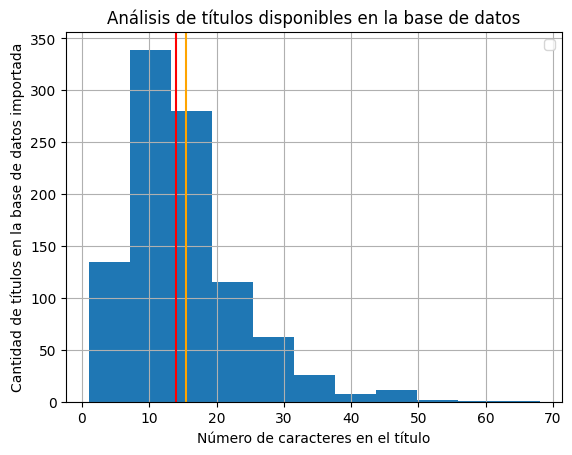

In [8]:
# grafica tus resultados
plt.hist(df['title_length'], bins='sturges')
plt.axvline(media_title, color ='orange')
plt.axvline(mediana_title, color ='red')

plt.xlabel('Número de caracteres en el título')
plt.ylabel('Cantidad de títulos en la base de datos importada')
plt.title ('Análisis de títulos disponibles en la base de datos')
plt.legend()
plt.grid()

plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [20]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
titulos_5 = df.loc[[10, 13, 14, 18, 22], ['title','title_length']]
##print (type(titulos_5))
##print (titulos_5)

lista_titulos_5 = [fila[1] for fila in titulos_5.values.tolist()]
print(lista_titulos_5)
print (type(lista_titulos_5))



[49, 12, 37, 10, 21]
<class 'list'>


In [19]:
# Calcula la media de los 5 valores
## media_title_5 = titulos_5['title_length'].mean()
## print (f' La media de la longitud de los 5 títulos seleccionados es de: {media_title_5}')

media_5 = np.mean(lista_titulos_5)
print(f'La media de la longitud de los 5 títlos seleccionados es de {media_5}')

La media de la longitud de los 5 títlos seleccionados es de 25.8


In [24]:
# Calcula las diferencias al cuadrado con respecto a la media
dif_al_cuadrado = [(x - media_5) ** 2 for x in lista_titulos_5]
print(dif_al_cuadrado)


[np.float64(538.24), np.float64(190.44000000000003), np.float64(125.43999999999998), np.float64(249.64000000000001), np.float64(23.040000000000006)]


In [27]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
#varianza_title_5 = df['dif_al_cuadrado'].mean()
#print(f' La varianza de la longitud de los 5 títulos seleccionados es de: {varianza_title_5:.2f}')
varianza_5 = np.mean(dif_al_cuadrado)
print(f'La varianza de la longitud de los 5 títulos seleccionados es de:{varianza_5:.2f}')

# Cálculo de la desviación estándar (raíz cuadrada de la varianza)
#desv_est_title_5 = varianza_title_5**0.5
#print(f' La desviación estándar de la longitud de los 5 títulos seleccionados es de: {desv_est_title_5:.2f}')
desvest_5= np.sqrt(varianza_5)
print(f'La desviación estándar de la longitud de los 5 títulos seleccionados es de:{desvest_5:.2f}')


La varianza de la longitud de los 5 títulos seleccionados es de:225.36
La desviación estándar de la longitud de los 5 títulos seleccionados es de:15.01
